In [1]:
%matplotlib inline


In [2]:
import pandas as pd

/Users/saurabh/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


### Reading all students list

In [3]:
students = pd.read_csv("../BlinkLists/CSE255FinalList.tsv",sep="\t",usecols=["pid","name","email"])
students['pid'] = students['pid'].map(lambda x: x.upper().strip())

In [4]:
students["Last Name"] = students['name'].map(lambda x: x.split(",")[0].strip())
students["First Name"] = students['name'].map(lambda x: x.split(",")[-1].strip())

### Reading final

In [21]:
final = pd.read_csv("CSE255/Final_cse.csv",usecols=["pid","grade"])
final['pid'] = final['pid'].map(lambda x: x.upper().strip())

In [22]:
final = final.merge(students,on="pid")

### Reading all Homework submissions

In [7]:
course = "cse"
hw_list = ["CSE255/"+"HW" + str(i) + "_graded_" + course + ".csv" for i in range(1,6) ]

In [8]:
grades = pd.DataFrame()

In [9]:
for hw in hw_list:
    df = pd.read_csv(hw,usecols=['pid','homework','grade'])
    grades = pd.concat([grades,df],ignore_index=True)

### Taking best 4 Homework submissions

In [10]:
best4=grades.groupby(by="pid")['grade'].nlargest(4).reset_index()
best4 = best4.drop(labels="level_1",axis=1).groupby(by="pid").sum().reset_index()
best4.columns = ["pid","hw_total"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x106f2f350>]], dtype=object)

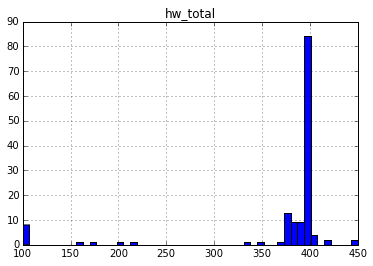

In [11]:
best4.hist(bins=50)

In [12]:
best4['hw_total(30%)'] = best4['hw_total']/400*70

### Concatenating final results and homeworks

In [23]:
final_grades = final.merge(best4,on="pid")

In [24]:
final_grades["final(70%)"] = final_grades['grade'] / 80 * 30

In [25]:
final_grades.drop('grade',axis=1,inplace=True)

In [26]:
final_grades["Total"] = final_grades["final(70%)"]  + final_grades['hw_total(30%)']

In [27]:
all_hws = pd.pivot(grades['pid'],grades['homework'],grades['grade']).reset_index()

In [28]:
final_grades.rename(columns={"pid":"Student ID"},inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1079e02d0>]], dtype=object)

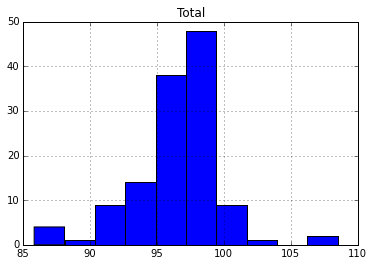

In [29]:
final_grades.hist("Total")

In [30]:
final_grades.head()

,Student ID,name,email,Last Name,First Name,hw_total,hw_total(30%),final(70%),Total
0,A53101356,"Avireddy, Srinivas",saviredd@ucsd.edu,Avireddy,Srinivas,405.0,70.875,24.84375,95.71875
1,A53099813,"Rangi, Anshuka",arangi@ucsd.edu,Rangi,Anshuka,400.0,70.000,28.65000,98.65000
2,A53088789,"Rajesh, Shanmathi",shrajesh@ucsd.edu,Rajesh,Shanmathi,395.0,69.125,23.64375,92.76875
3,A53095373,"Gadgil, Mitesh Ashutosh",mgadgil@ucsd.edu,Gadgil,Mitesh Ashutosh,388.0,67.900,28.87500,96.77500
4,U06990406,"Weggersen, Benjamin",ax003948@acsmail.ucsd.edu,Weggersen,Benjamin,393.0,68.775,28.87500,97.65000
